# Figure 2C 

# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import symbols, solve, simplify
import pandas as pd
import sympy as sp
plt.rcParams.update({'font.size': 20})

# Definitions

Function to define the properties of the axis of a plot

In [2]:
def my_axsis(ax, xlim, ylim, xticks, title, xtickslabels, bold=True, scale='lin'):    
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.set_xticks(xticks)
    ax.set_title(title)
    ax.set_xticklabels(xtickslabels)
    
    if bold==True:
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(1.2)
            
    if scale=='log':
        ax.set_yscale('log', base=2)

# Model 

Definition of the parameters of the model

In [3]:
T, V1, V2, K1, K2, Kb = symbols('T V1 V2 K1 K2 Kb') 
Vs, Rb, Ks, Vrg, Qb, Krg = symbols('Vs Rb Ks Vrg Qb Krg')
R, F, Kd, Q, E, Ke = symbols('R F Kd Q E Ke')
S1, Qtot, S2, Rtot= symbols('S1 Qtot S2 Rtot')

The evolution equation for T

In [4]:
# Evolution equation for T: 
expr = V1*(1-T)/(K1+(1-T))-V2*T/(K2+T)-Kb*T
expr_simplified= V1*(1-T)*(K2+T) -V2*T*(K1+(1-T))-Kb*T*(K1+(1-T))*(K2+T)
print('Evolution equation for T:')
print(expr)

# Substitute the expression for V1 and V2 in the evolution equation for T:  
expr_RQ= expr_simplified.subs([(V1, Vs*(R*F/(Kd+F))/(Ks+(R*F/(Kd+F)))),(V2, Vrg*(Q*E/(Ke+E))/(Krg+(Q*E/(Ke+E))))])

# Substitute the expressions for Q and R
expr_S1S2 = expr_RQ.subs([(R, Rtot*S1),(Q, Qtot*S2)])

# Expliciting the relation between S1 and S2 to obtain T(FGF, S1): 
expr_T = expr_S1S2.subs([(S2,-1.1265*S1 +0.9092)])

print('Evolution equation for T (all parameters explicited):')
print(expr_T)

# Solve the equation 
sol = solve(expr_T, T)[2]

Evolution equation for T:
-Kb*T - T*V2/(K2 + T) + V1*(1 - T)/(K1 - T + 1)
Evolution equation for T (all parameters explicited):
-E*Qtot*T*Vrg*(0.9092 - 1.1265*S1)*(K1 - T + 1)/((E + Ke)*(E*Qtot*(0.9092 - 1.1265*S1)/(E + Ke) + Krg)) + F*Rtot*S1*Vs*(1 - T)*(K2 + T)/((F + Kd)*(F*Rtot*S1/(F + Kd) + Ks)) - Kb*T*(K2 + T)*(K1 - T + 1)


Definition of the function ExprT that compute T as a function of all the parameters of the equation

In [5]:
def exprT(Vs_v=1, Vrg_v=0.4, K1_v=0.5, K2_v=0.2, Krg_v=1200, Ks_v=1200, Kb_v=0.2, F_v=5, Kd_v=25, E_v=5, Ke_v=50, Rtot_v=2000, Qtot_v=2000, S1_v=0.5):
    sol_T = sol.subs([(Vs,Vs_v),(Vrg,Vrg_v),(K1, K1_v),(K2,K2_v),(Krg, Krg_v), (Ks, Ks_v), (Kb, Kb_v),(F, F_v),(Kd, Kd_v),(E,E_v), (Ke, Ke_v),(Rtot, Rtot_v),(Qtot,Qtot_v),(S1,S1_v)])
    sol_T = np.real(np.array(sol_T,complex))
    return sol_T

Definition of the function to compute Erk (as a function of T):

In [6]:
def Erk(T,n=2, Kerk=0.5, Erk_max=1, Erk_bas=0): 
    Erk = [ Erk_max* T[i]**n/(T[i]**n +Kerk**n)+Erk_bas for i in range(len(T)) ]
    return Erk

# Import the experimental data and reproduce the figures of the paper

In [7]:
#read the excel file with the experimental data
data_S1 = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Cell surface contacts')
df_S1 = pd.DataFrame(data_S1)

data_Fig2A = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Fig 2A & S1A')
df_Fig2A = pd.DataFrame(data_Fig2A)

data_Fig2C = pd.read_excel('/Users/rossanabettoni/Desktop/PhD/Article_PLOS/ExpData.xlsx', sheet_name='Fig 2C & S1D')
df_Fig2C = pd.DataFrame(data_Fig2C)

Experimental data figure 1C

In [8]:
# Reltive area of cell surface contact with FGF expressing cells (divided by cell type)
a65_RelContactArea_A = np.array(df_S1['a6.5 S1'].values.tolist())[0:25] 
a66_RelContactArea_A = np.array(df_S1['a6.6 S1'].values.tolist())[0:25] 
a67_RelContactArea_A = np.array(df_S1['a6.7 S1'].values.tolist())[0:25] 
a68_RelContactArea_A = np.array(df_S1['a6.8 S1'].values.tolist())[0:25] 

Experimental data figure 2A

In [9]:
# Measured levels of Erk fluorescence (divided by cell type)
a65_Erk = np.array(df_Fig2A['a6.5'].values.tolist())
a66_Erk = np.array(df_Fig2A['a6.6'].values.tolist())
a67_Erk = np.array(df_Fig2A['a6.7'].values.tolist())
a68_Erk = np.array(df_Fig2A['a6.8'].values.tolist())

Experimental data figure 2C

In [10]:
# Ratios: Erk fluorescence level in mutant embryo/ Erk fluorescence level in control embryo
a65_ratio_dnFGFR = np.array(df_Fig2C['a6.5.1'].values.tolist())
a66_ratio_dnFGFR = np.array(df_Fig2C['a6.6.1'].values.tolist())
a67_ratio_dnFGFR = np.array(df_Fig2C['a6.7.1'].values.tolist())
a68_ratio_dnFGFR = np.array(df_Fig2C['a6.8.1'].values.tolist())

a65_ratio_dnEph = np.array(df_Fig2C['a6.5.3'].values.tolist())
a66_ratio_dnEph = np.array(df_Fig2C['a6.6.3'].values.tolist())
a67_ratio_dnEph = np.array(df_Fig2C['a6.7.3'].values.tolist())
a68_ratio_dnEph = np.array(df_Fig2C['a6.8.3'].values.tolist())

# Compute the mean values of the experimental data 
a65_mean_dnFGFR = np.nanmean(a65_ratio_dnFGFR)
a66_mean_dnFGFR = np.nanmean(a66_ratio_dnFGFR)
a67_mean_dnFGFR = np.nanmean(a67_ratio_dnFGFR)
a68_mean_dnFGFR = np.nanmean(a68_ratio_dnFGFR)

mean_dnFGFR = [a65_mean_dnFGFR, a66_mean_dnFGFR, a67_mean_dnFGFR, a68_mean_dnFGFR]

a65_mean_dnEph = np.nanmean(a65_ratio_dnEph)
a66_mean_dnEph = np.nanmean(a66_ratio_dnEph)
a67_mean_dnEph = np.nanmean(a67_ratio_dnEph)
a68_mean_dnEph = np.nanmean(a68_ratio_dnEph)

mean_dnEph = [a65_mean_dnEph, a66_mean_dnEph, a67_mean_dnEph, a68_mean_dnEph]

# Compute the standard deviations
a65_std_dnFGFR = np.nanstd(a65_ratio_dnFGFR)
a66_std_dnFGFR = np.nanstd(a66_ratio_dnFGFR)
a67_std_dnFGFR = np.nanstd(a67_ratio_dnFGFR)
a68_std_dnFGFR = np.nanstd(a68_ratio_dnFGFR)

std_dnFGFR = [a65_std_dnFGFR, a66_std_dnFGFR, a67_std_dnFGFR, a68_std_dnFGFR]

a65_std_dnEph = np.nanstd(a65_ratio_dnEph)
a66_std_dnEph = np.nanstd(a66_ratio_dnEph)
a67_std_dnEph = np.nanstd(a67_ratio_dnEph)
a68_std_dnEph = np.nanstd(a68_ratio_dnEph)

std_dnEph = [a65_std_dnEph, a66_std_dnEph, a67_std_dnEph, a68_std_dnEph]

# Results

## Figure 2C

### Model predictions

 #### Control

In [11]:
# Compute T 
T_pred_a65_c = [exprT(S1_v= a65_RelContactArea_A[i]) for i in range(len(a65_RelContactArea_A))]
T_pred_a66_c = [exprT(S1_v= a66_RelContactArea_A[i]) for i in range(len(a66_RelContactArea_A))]
T_pred_a67_c = [exprT(S1_v= a67_RelContactArea_A[i]) for i in range(len(a67_RelContactArea_A))]
T_pred_a68_c = [exprT(S1_v= a68_RelContactArea_A[i]) for i in range(len(a68_RelContactArea_A))]

# Compute Erk activity 
Erk_pred_a65_c_a = Erk(T_pred_a65_c)
Erk_pred_a66_c_a = Erk(T_pred_a66_c)
Erk_pred_a67_c_a = Erk(T_pred_a67_c)
Erk_pred_a68_c_a = Erk(T_pred_a68_c)

# Compute the mean Erk activity value for each cell type (with our model)
mean_a65_Erk_model_c_a= np.mean(Erk_pred_a65_c_a) 
mean_a66_Erk_model_c_a= np.mean(Erk_pred_a66_c_a)
mean_a67_Erk_model_c_a= np.mean(Erk_pred_a67_c_a)
mean_a68_Erk_model_c_a= np.mean(Erk_pred_a68_c_a)
Erk_mean_c_a = [mean_a65_Erk_model_c_a, mean_a66_Erk_model_c_a, mean_a67_Erk_model_c_a, mean_a68_Erk_model_c_a]

# Compute the std
sdev_a65_Erk_model_c_a = np.std(Erk_pred_a65_c_a)
sdev_a66_Erk_model_c_a = np.std(Erk_pred_a66_c_a)
sdev_a67_Erk_model_c_a = np.std(Erk_pred_a67_c_a)
sdev_a68_Erk_model_c_a = np.std(Erk_pred_a68_c_a)

In [12]:
# Compute Erk fluorescence 

Erk_m= 1850 
Erk_b = np.mean(a68_Erk) 

Erk_pred_a65_c_f = Erk(T_pred_a65_c, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a66_c_f = Erk(T_pred_a66_c, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a67_c_f = Erk(T_pred_a67_c, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a68_c_f = Erk(T_pred_a68_c, Erk_max=Erk_m, Erk_bas=Erk_b)

# Compute the mean Erk fluorescence value for each cell type
mean_a65_Erk_model_c_f= np.mean(Erk_pred_a65_c_f) 
mean_a66_Erk_model_c_f= np.mean(Erk_pred_a66_c_f)
mean_a67_Erk_model_c_f= np.mean(Erk_pred_a67_c_f)
mean_a68_Erk_model_c_f= np.mean(Erk_pred_a68_c_f)
Erk_mean_c_f = [mean_a65_Erk_model_c_f, mean_a66_Erk_model_c_f, mean_a67_Erk_model_c_f, mean_a68_Erk_model_c_f]

# Compute the error on the mean
std_Erk_pred_a65_c_f = np.sqrt(Erk_m**2*sdev_a65_Erk_model_c_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a66_c_f = np.sqrt(Erk_m**2*sdev_a66_Erk_model_c_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a67_c_f = np.sqrt(Erk_m**2*sdev_a67_Erk_model_c_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a68_c_f = np.sqrt(Erk_m**2*sdev_a68_Erk_model_c_a**2+np.std(a68_Erk)**2)

 #### dnFGFR

In [13]:
# Compute T 
T_pred_a65_dnFGFR = [exprT(S1_v= a65_RelContactArea_A[i],Rtot_v= 100) for i in range(len(a65_RelContactArea_A))]
T_pred_a66_dnFGFR = [exprT(S1_v= a66_RelContactArea_A[i],Rtot_v= 100) for i in range(len(a66_RelContactArea_A))]
T_pred_a67_dnFGFR = [exprT(S1_v= a67_RelContactArea_A[i],Rtot_v= 100) for i in range(len(a67_RelContactArea_A))]
T_pred_a68_dnFGFR = [exprT(S1_v= a68_RelContactArea_A[i],Rtot_v= 100) for i in range(len(a68_RelContactArea_A))]

# Compute Erk activity 
Erk_pred_a65_dnFGFR_a = Erk(T_pred_a65_dnFGFR)
Erk_pred_a66_dnFGFR_a = Erk(T_pred_a66_dnFGFR)
Erk_pred_a67_dnFGFR_a = Erk(T_pred_a67_dnFGFR)
Erk_pred_a68_dnFGFR_a = Erk(T_pred_a68_dnFGFR)

# Compute the mean Erk activity value for each cell type (with our model)
mean_a65_Erk_model_dnFGFR_a= np.mean(Erk_pred_a65_dnFGFR_a) 
mean_a66_Erk_model_dnFGFR_a= np.mean(Erk_pred_a66_dnFGFR_a)
mean_a67_Erk_model_dnFGFR_a= np.mean(Erk_pred_a67_dnFGFR_a)
mean_a68_Erk_model_dnFGFR_a= np.mean(Erk_pred_a68_dnFGFR_a)
Erk_mean_dnFGFR_a = [mean_a65_Erk_model_dnFGFR_a, mean_a66_Erk_model_dnFGFR_a, mean_a67_Erk_model_dnFGFR_a, mean_a68_Erk_model_dnFGFR_a]

# Compute the std
sdev_a65_Erk_model_dnFGFR_a = np.std(Erk_pred_a65_dnFGFR_a)
sdev_a66_Erk_model_dnFGFR_a = np.std(Erk_pred_a66_dnFGFR_a)
sdev_a67_Erk_model_dnFGFR_a = np.std(Erk_pred_a67_dnFGFR_a)
sdev_a68_Erk_model_dnFGFR_a = np.std(Erk_pred_a68_dnFGFR_a)

In [14]:
# Compute Erk fluorescence 
Erk_m= 1850 
Erk_b = np.mean(a68_Erk) 

Erk_pred_a65_dnFGFR_f = Erk(T_pred_a65_dnFGFR, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a66_dnFGFR_f = Erk(T_pred_a66_dnFGFR, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a67_dnFGFR_f = Erk(T_pred_a67_dnFGFR, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a68_dnFGFR_f = Erk(T_pred_a68_dnFGFR, Erk_max=Erk_m, Erk_bas=Erk_b)

# Compute the mean Erk fluorescence value for each cell type 
mean_a65_Erk_model_dnFGFR_f= np.mean(Erk_pred_a65_dnFGFR_f) 
mean_a66_Erk_model_dnFGFR_f= np.mean(Erk_pred_a66_dnFGFR_f)
mean_a67_Erk_model_dnFGFR_f= np.mean(Erk_pred_a67_dnFGFR_f)
mean_a68_Erk_model_dnFGFR_f= np.mean(Erk_pred_a68_dnFGFR_f)
Erk_mean_dnFGFR_f = [mean_a65_Erk_model_dnFGFR_f, mean_a66_Erk_model_dnFGFR_f, mean_a67_Erk_model_dnFGFR_f, mean_a68_Erk_model_dnFGFR_f]

# Compute the error on the mean
std_Erk_pred_a65_dnFGFR_f = np.sqrt(Erk_m**2*sdev_a65_Erk_model_dnFGFR_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a66_dnFGFR_f = np.sqrt(Erk_m**2*sdev_a66_Erk_model_dnFGFR_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a67_dnFGFR_f = np.sqrt(Erk_m**2*sdev_a67_Erk_model_dnFGFR_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a68_dnFGFR_f = np.sqrt(Erk_m**2*sdev_a68_Erk_model_dnFGFR_a**2+np.std(a68_Erk)**2)

In [15]:
# Compute the ratios 
Ratio_a65_dnFGFR = [Erk_pred_a65_dnFGFR_f[i]/Erk_pred_a65_c_f[i] for i in range(len(Erk_pred_a65_dnFGFR_f))]
Ratio_a66_dnFGFR = [Erk_pred_a66_dnFGFR_f[i]/Erk_pred_a66_c_f[i] for i in range(len(Erk_pred_a66_dnFGFR_f))]
Ratio_a67_dnFGFR = [Erk_pred_a67_dnFGFR_f[i]/Erk_pred_a67_c_f[i] for i in range(len(Erk_pred_a67_dnFGFR_f))]
Ratio_a68_dnFGFR = [Erk_pred_a68_dnFGFR_f[i]/Erk_pred_a68_c_f[i] for i in range(len(Erk_pred_a68_dnFGFR_f))]

# Compute the mean of the ratios
mean_ratio_dnFGFR = [Erk_mean_dnFGFR_f[i]/Erk_mean_c_f[i] for i in range(4)]

# Compute the errors on the ratios
std_ratio_pred_a65_dnFGFR = mean_ratio_dnFGFR[0]*np.sqrt(std_Erk_pred_a65_c_f**2/mean_a65_Erk_model_c_f**2+std_Erk_pred_a65_dnFGFR_f**2/mean_a65_Erk_model_dnFGFR_f**2)
std_ratio_pred_a66_dnFGFR = mean_ratio_dnFGFR[1]*np.sqrt(std_Erk_pred_a66_c_f**2/mean_a66_Erk_model_c_f**2+std_Erk_pred_a66_dnFGFR_f**2/mean_a66_Erk_model_dnFGFR_f**2)
std_ratio_pred_a67_dnFGFR = mean_ratio_dnFGFR[2]*np.sqrt(std_Erk_pred_a67_c_f**2/mean_a67_Erk_model_c_f**2+std_Erk_pred_a67_dnFGFR_f**2/mean_a67_Erk_model_dnFGFR_f**2)
std_ratio_pred_a68_dnFGFR = mean_ratio_dnFGFR[3]*np.sqrt(std_Erk_pred_a68_c_f**2/mean_a68_Erk_model_c_f**2+std_Erk_pred_a68_dnFGFR_f**2/mean_a68_Erk_model_dnFGFR_f**2)

std_pred_dnFGFR = [std_ratio_pred_a65_dnFGFR,std_ratio_pred_a66_dnFGFR,std_ratio_pred_a67_dnFGFR,std_ratio_pred_a68_dnFGFR]


#### Eph3$\Delta$C

In [16]:
# Compute T 
T_pred_a65_Eph = [exprT(S1_v= a65_RelContactArea_A[i],Qtot_v= 10) for i in range(len(a65_RelContactArea_A))]
T_pred_a66_Eph = [exprT(S1_v= a66_RelContactArea_A[i],Qtot_v= 10) for i in range(len(a66_RelContactArea_A))]
T_pred_a67_Eph = [exprT(S1_v= a67_RelContactArea_A[i],Qtot_v= 10) for i in range(len(a67_RelContactArea_A))]
T_pred_a68_Eph = [exprT(S1_v= a68_RelContactArea_A[i],Qtot_v= 10) for i in range(len(a68_RelContactArea_A))]

# Compute Erk activity 
Erk_pred_a65_Eph_a = Erk(T_pred_a65_Eph)
Erk_pred_a66_Eph_a = Erk(T_pred_a66_Eph)
Erk_pred_a67_Eph_a = Erk(T_pred_a67_Eph)
Erk_pred_a68_Eph_a = Erk(T_pred_a68_Eph)

# Compute the mean Erk activity value for each cell type
mean_a65_Erk_model_Eph_a= np.mean(Erk_pred_a65_Eph_a) 
mean_a66_Erk_model_Eph_a= np.mean(Erk_pred_a66_Eph_a)
mean_a67_Erk_model_Eph_a= np.mean(Erk_pred_a67_Eph_a)
mean_a68_Erk_model_Eph_a= np.mean(Erk_pred_a68_Eph_a)
Erk_mean_Eph_a = [mean_a65_Erk_model_Eph_a, mean_a66_Erk_model_Eph_a, mean_a67_Erk_model_Eph_a, mean_a68_Erk_model_Eph_a]

# Compute the std
sdev_a65_Erk_model_Eph_a = np.std(Erk_pred_a65_Eph_a)
sdev_a66_Erk_model_Eph_a = np.std(Erk_pred_a66_Eph_a)
sdev_a67_Erk_model_Eph_a = np.std(Erk_pred_a67_Eph_a)
sdev_a68_Erk_model_Eph_a = np.std(Erk_pred_a68_Eph_a)

In [17]:
# Compute Erk fluorescence 
Erk_m= 1850 
Erk_b = np.mean(a68_Erk) 

Erk_pred_a65_Eph_f = Erk(T_pred_a65_Eph, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a66_Eph_f = Erk(T_pred_a66_Eph, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a67_Eph_f = Erk(T_pred_a67_Eph, Erk_max=Erk_m, Erk_bas=Erk_b)
Erk_pred_a68_Eph_f = Erk(T_pred_a68_Eph, Erk_max=Erk_m, Erk_bas=Erk_b)

# Compute the mean Erk fluorescence value for each cell type (with our model)
mean_a65_Erk_model_Eph_f= np.mean(Erk_pred_a65_Eph_f) 
mean_a66_Erk_model_Eph_f= np.mean(Erk_pred_a66_Eph_f)
mean_a67_Erk_model_Eph_f= np.mean(Erk_pred_a67_Eph_f)
mean_a68_Erk_model_Eph_f= np.mean(Erk_pred_a68_Eph_f)
Erk_mean_Eph_f = [mean_a65_Erk_model_Eph_f, mean_a66_Erk_model_Eph_f, mean_a67_Erk_model_Eph_f, mean_a68_Erk_model_Eph_f]

# Compute the error on the mean
std_Erk_pred_a65_Eph_f = np.sqrt(Erk_m**2*sdev_a65_Erk_model_Eph_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a66_Eph_f = np.sqrt(Erk_m**2*sdev_a66_Erk_model_Eph_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a67_Eph_f = np.sqrt(Erk_m**2*sdev_a67_Erk_model_Eph_a**2+np.std(a68_Erk)**2)
std_Erk_pred_a68_Eph_f = np.sqrt(Erk_m**2*sdev_a68_Erk_model_Eph_a**2+np.std(a68_Erk)**2)

In [18]:
# Compute the ratios 
Ratio_a65_Eph = [Erk_pred_a65_Eph_f[i]/Erk_pred_a65_c_f[i] for i in range(len(Erk_pred_a65_Eph_f))]
Ratio_a66_Eph = [Erk_pred_a66_Eph_f[i]/Erk_pred_a66_c_f[i] for i in range(len(Erk_pred_a66_Eph_f))]
Ratio_a67_Eph = [Erk_pred_a67_Eph_f[i]/Erk_pred_a67_c_f[i] for i in range(len(Erk_pred_a67_Eph_f))]
Ratio_a68_Eph = [Erk_pred_a68_Eph_f[i]/Erk_pred_a68_c_f[i] for i in range(len(Erk_pred_a68_Eph_f))]

# Compute the mean of the ratios
mean_ratio_Eph = [Erk_mean_Eph_f[i]/Erk_mean_c_f[i] for i in range(4)]

# Compute the errors on the ratios
std_ratio_pred_a65_Eph = mean_ratio_Eph[0]*np.sqrt(std_Erk_pred_a65_c_f**2/mean_a65_Erk_model_c_f**2+std_Erk_pred_a65_Eph_f**2/mean_a65_Erk_model_Eph_f**2)
std_ratio_pred_a66_Eph = mean_ratio_Eph[1]*np.sqrt(std_Erk_pred_a66_c_f**2/mean_a66_Erk_model_c_f**2+std_Erk_pred_a66_Eph_f**2/mean_a66_Erk_model_Eph_f**2)
std_ratio_pred_a67_Eph = mean_ratio_Eph[2]*np.sqrt(std_Erk_pred_a67_c_f**2/mean_a67_Erk_model_c_f**2+std_Erk_pred_a67_Eph_f**2/mean_a67_Erk_model_Eph_f**2)
std_ratio_pred_a68_Eph = mean_ratio_Eph[3]*np.sqrt(std_Erk_pred_a68_c_f**2/mean_a68_Erk_model_c_f**2+std_Erk_pred_a68_Eph_f**2/mean_a68_Erk_model_Eph_f**2)

std_pred_Eph = [std_ratio_pred_a65_Eph,std_ratio_pred_a66_Eph,std_ratio_pred_a67_Eph,std_ratio_pred_a68_Eph]

### Comparison with experimental data 

#### dnFGFR

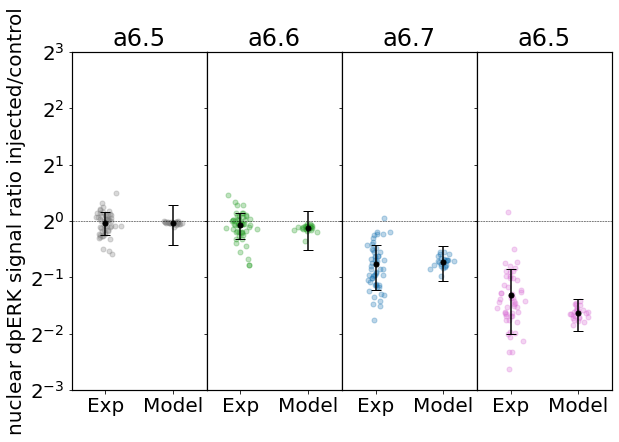

In [19]:
y= np.linspace(0,5)
z= np.ones(len(y))

fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(1,4, hspace=0,wspace=0)
axs = gs.subplots(sharey=True)

# a6.8
axs[0].plot(y,z,'--',color='black', linewidth=0.5)

x = np.random.normal(1, 0.08, size=len(a68_ratio_dnFGFR ))
axs[0].plot(x,a68_ratio_dnFGFR,'.', color='grey', alpha=0.3, markersize=10,zorder=1)

x = 1 
axs[0].errorbar(x,a68_mean_dnFGFR ,a68_std_dnFGFR, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Ratio_a68_dnFGFR))
axs[0].plot(x,Ratio_a68_dnFGFR,'.', color='grey', alpha=0.3, markersize=10,zorder=1)

x = 2 
axs[0].errorbar(x,mean_ratio_dnFGFR[3] ,std_ratio_pred_a68_dnFGFR, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[0], xlim= [0.5,2.5], ylim=[2**(-3),2**(3)], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True, scale='log')
axs[0].set_ylabel('nuclear dpERK signal ratio injected/control')


# a6.6 
axs[1].plot(y,z,'--',color='black', linewidth=0.5)

x = np.random.normal(1, 0.08, size=len(a66_ratio_dnFGFR ))
axs[1].plot(x,a66_ratio_dnFGFR,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 1 
axs[1].errorbar(x,a66_mean_dnFGFR ,a66_std_dnFGFR, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Ratio_a66_dnFGFR))
axs[1].plot(x,Ratio_a66_dnFGFR,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 2 
axs[1].errorbar(x,mean_ratio_dnFGFR[1] ,std_ratio_pred_a66_dnFGFR, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[1], xlim= [0.5,2.5], ylim=[2**(-3),2**(3)], xticks=[1,2], title='a6.6', xtickslabels=['Exp', 'Model'], bold=True, scale='log')


# a6.7 
axs[2].plot(y,z,'--',color='black', linewidth=0.5)

x = np.random.normal(1, 0.08, size=len(a67_ratio_dnFGFR ))
axs[2].plot(x,a67_ratio_dnFGFR,'.', color='tab:blue', alpha=0.3, markersize=10, zorder=1)

x = 1 
axs[2].errorbar(x,a67_mean_dnFGFR ,a67_std_dnFGFR, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Ratio_a67_dnFGFR))
axs[2].plot(x,Ratio_a67_dnFGFR,'.', color='tab:blue', alpha=0.3, markersize=10, zorder=1)

x = 2 
axs[2].errorbar(x,mean_ratio_dnFGFR[2] ,std_ratio_pred_a67_dnFGFR, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[2], xlim= [0.5,2.5], ylim=[2**(-3),2**(3)], xticks=[1,2], title='a6.7', xtickslabels=['Exp', 'Model'], bold=True, scale='log')


# a6.5
axs[3].plot(y,z,'--',color='black', linewidth=0.5)

x = np.random.normal(1, 0.08, size=len(a65_ratio_dnFGFR ))
axs[3].plot(x,a65_ratio_dnFGFR,'.', color='orchid', alpha=0.3,zorder=1, markersize=10)

x = 1 
axs[3].errorbar(x,a65_mean_dnFGFR ,a65_std_dnFGFR, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Ratio_a65_dnFGFR))
axs[3].plot(x,Ratio_a65_dnFGFR,'.', color='orchid', alpha=0.3,zorder=1, markersize=10)

x = 2 
axs[3].errorbar(x,mean_ratio_dnFGFR[0] ,std_ratio_pred_a65_dnFGFR, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[3], xlim= [0.5,2.5], ylim=[2**(-3),2**(3)], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True, scale='log')

plt.tight_layout()
plt.show()

#### Eph3$\Delta$C

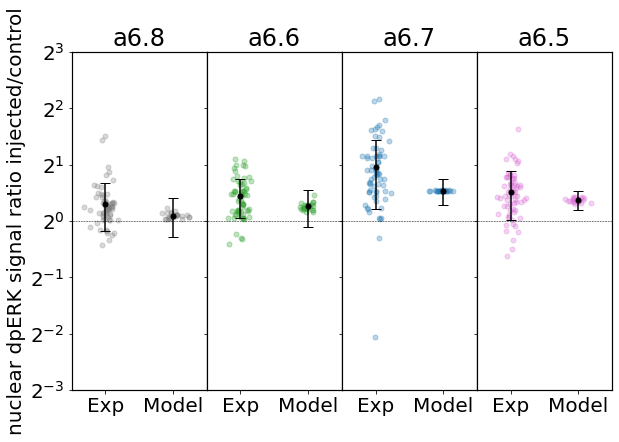

In [20]:
y= np.linspace(0,5)
z= np.ones(len(y))

fig = plt.figure(figsize=(9,6))
gs = fig.add_gridspec(1,4, hspace=0,wspace=0)
axs = gs.subplots(sharey=True)

# a6.8
axs[0].plot(y,z,'--',color='black', linewidth=0.5)

x = np.random.normal(1, 0.08, size=len(a68_ratio_dnEph ))
axs[0].plot(x,a68_ratio_dnEph,'.', color='grey', alpha=0.3, markersize=10, zorder=1)

x = 1 
axs[0].errorbar(x,a68_mean_dnEph ,a68_std_dnEph, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Ratio_a68_Eph))
axs[0].plot(x,Ratio_a68_Eph,'.', color='grey', alpha=0.3, markersize=10, zorder=1)

x = 2 
axs[0].errorbar(x,mean_ratio_Eph[3] ,std_ratio_pred_a68_Eph, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[0], xlim= [0.5,2.5], ylim=[2**(-3),2**(3)], xticks=[1,2], title='a6.8', xtickslabels=['Exp', 'Model'], bold=True, scale='log')
axs[0].set_ylabel('nuclear dpERK signal ratio injected/control')


# a6.6 
axs[1].plot(y,z,'--',color='black', linewidth=0.5)

x = np.random.normal(1, 0.08, size=len(a66_ratio_dnEph ))
axs[1].plot(x,a66_ratio_dnEph,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 1 
axs[1].errorbar(x,a66_mean_dnEph ,a66_std_dnEph, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Ratio_a66_Eph))
axs[1].plot(x,Ratio_a66_Eph,'.', color='tab:green', alpha=0.3, markersize=10, zorder=1)

x = 2 
axs[1].errorbar(x,mean_ratio_Eph[1],std_ratio_pred_a66_Eph, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[1], xlim= [0.5,2.5], ylim=[2**(-3),2**(3)], xticks=[1,2], title='a6.6', xtickslabels=['Exp', 'Model'], bold=True, scale='log')


# a6.7 
axs[2].plot(y,z,'--',color='black', linewidth=0.5)

x = np.random.normal(1, 0.08, size=len(a67_ratio_dnEph ))
axs[2].plot(x,a67_ratio_dnEph,'.', color='tab:blue', alpha=0.3,zorder=1, markersize=10)

x = 1 
axs[2].errorbar(x,a67_mean_dnEph ,a67_std_dnEph, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Ratio_a67_Eph))
axs[2].plot(x,Ratio_a67_Eph,'.', color='tab:blue', alpha=0.3,zorder=1, markersize=10)

x = 2 
axs[2].errorbar(x,mean_ratio_Eph[2] ,std_ratio_pred_a67_Eph, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[2], xlim= [0.5,2.5], ylim=[2**(-3),2**(3)], xticks=[1,2], title='a6.7', xtickslabels=['Exp', 'Model'], bold=True, scale='log')


# a6.5
axs[3].plot(y,z,'--',color='black', linewidth=0.5)

x = np.random.normal(1, 0.08, size=len(a65_ratio_dnEph ))
axs[3].plot(x,a65_ratio_dnEph,'.', color='orchid', alpha=0.3, markersize=10,zorder=1)

x = 1 
axs[3].errorbar(x,a65_mean_dnEph ,a65_std_dnEph, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

x = np.random.normal(2, 0.08, size=len(Ratio_a65_Eph))
axs[3].plot(x,Ratio_a65_Eph,'.', color='orchid', alpha=0.3, markersize=10,zorder=1)

x = 2 
axs[3].errorbar(x,mean_ratio_Eph[0] ,std_ratio_pred_a65_Eph, marker='o',markersize=5,color='black', capsize=5,mfc='black', mec='black', ls='none',zorder=2)

my_axsis(axs[3], xlim= [0.5,2.5], ylim=[2**(-3),2**(3)], xticks=[1,2], title='a6.5', xtickslabels=['Exp', 'Model'], bold=True, scale='log')

plt.tight_layout()
plt.show()